<a href="https://colab.research.google.com/github/Code-Ebullient/Ames_house_price_by_zone/blob/main/House_Price_By_Zonal_Model_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The real estate market is a crucial component of any economy, influencing various socioeconomic factors. One of the critical aspects of this market is house pricing, which not only reflects the value of properties but also affects the development and character of different zonal regions.

Understanding the dynamics of house pricing is essential for stakeholders, including potential homeowners, investors, policymakers, and urban planners. This project aims to investigate the intricate relationship between **house prices in Ames, Iowa residence more focus on it's zonal regions**, also emphasize on how different features plays a major role in these areas and making a **prediction of the final price** on each.

By leveraging advanced regression techniques, this project will be assumed to interprete models that can predict house prices with a high degree of precision. The insights gained, will not only enhance the predictive capabilities but also deepen the understanding of how real estate housing market works.

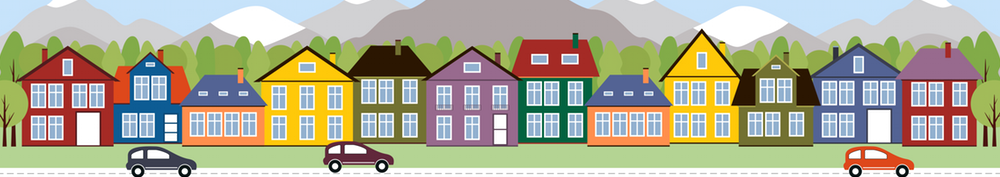


## Problem Statement

House pricing is influenced by a multitude of factors, including location area, housetyle, sometimes materials used, and regional characteristics such as proximity to amenities, overall neighborhood appeal etc. These factors interact in complex ways to determine the value of properties in different zones. As house prices change, they can lead to significant shifts in the demographic and socioeconomic fabric of these regions.

This project addresses the following key question:

**How do Price affect houses per the zonal regions in which they are located?**

**And what is the likely price in the future?**

To delve into these question, we will explore several sub-questions:

- What are the primary determinants of house prices in different zonal regions?

- What patterns can be observed in the spatial distribution of house prices, and how do these patterns evolve over time?

- How do we improve regional insights for house prices?

- Using different model to help, make a prediction of a future price.

These will assit investors and developers in targeting high-growth areas and it's cost.

## Project Scope

1. **Download the dataset from Kaggle or another source**.
  - Load the dataset into a Pandas DataFrame.
  - Inspect the dataset for missing values and handle them appropriately.
  - Perform data cleaning to ensure the dataset is ready for analysis.
  - Exploratory Data Analysis (EDA)

2. **Conduct exploratory data analysis to understand the distribution of features and the target variable (house prices)**.
  - Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.
  - Identify and handle outliers in the dataset.

3. **Feature Engineering**
  - Create new features that may help improve the model's performance.
  - Encode categorical variables using one-hot or label encoding techniques.
  - Normalize or standardize numerical features as needed.

4. **Model Training and Evaluation**
  - Split the dataset into training and testing sets.
  - Choose and justify the selection of machine learning algorithms (e.g., Linear Regression (sklearn), Decision Tree, Random Forest (sklearn), Gradient Boosting).
  - Train multiple models and evaluate their performance using appropriate metrics (e.g., RMSE, MAE, R²).
  - Perform hyperparameter tuning to optimize the model's performance.
  - Select and evaluate the best-performing model on the testing set. NB: Ridge and Lasso for Reguralization

5. **Model Interpretation and Reporting**
  - Interpret the results of the best-performing model and explain the importance of critical features.
  - Create visualizations to support your findings and model interpretations.
  - Write a comprehensive report summarizing the project, including the methodology, results, and conclusions.

## Data Collection and Understanding

In [1]:
# Importing necessary libraries

import os # For operating system dependent functionality which we may or maynot need
from pathlib import Path # For file system path manipulations which we may need

import matplotlib.pyplot as plt # For visualization in charts
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from IPython.display import Markdown, display

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))


import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
# Load and read the dataset

df_train = pd.read_csv("/content/train.csv", index_col="Id")

In [3]:
# Increase default rows and columns
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [4]:
# Peek at the dataset values
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Checking the dimension of our dataset ie the number of rows and columns using shape method
printmd(f"The Dataset Dimension is: **{df_train.shape[0]}** rows,  **{df_train.shape[1]}** columns")

The Dataset Dimension is: **1460** rows,  **80** columns

In [6]:
# Checking for Duplicates

print('Known observations: {}\nUnique observations: {}'.format(len(df_train.index),len(df_train.drop_duplicates().index)))
print('--------------------------------')

printmd("**No duplicates Found!**")

Known observations: 1460
Unique observations: 1460
--------------------------------


**No duplicates Found!**

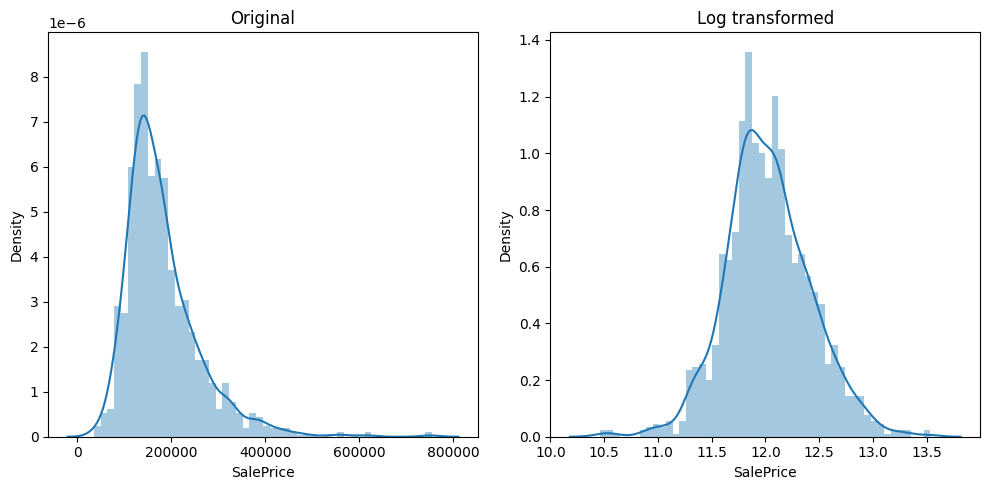

In [7]:
# Examining the Target variable
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice, bins=50)
plt.title('Original')

# Using log to transform it into Uniform symetric
plt.subplot(1,2,2)
sns.distplot(np.log1p(df_train.SalePrice), bins=50)
plt.title('Log transformed')

plt.tight_layout()

Our Target variable is positively skewed so.....

In [8]:
# Skew and kurtosis for SalePrice
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

print('--------------------------------')

printmd("1.88 Skewness means that the Price is **Highly Symmetric on the Positive**")
printmd("6.5 Kurtosis means **Large Number of Outliers**")

Skewness: 1.882876
Kurtosis: 6.536282
--------------------------------


1.88 Skewness means that the Price is **Highly Symmetric on the Positive**

6.5 Kurtosis means **Large Number of Outliers**

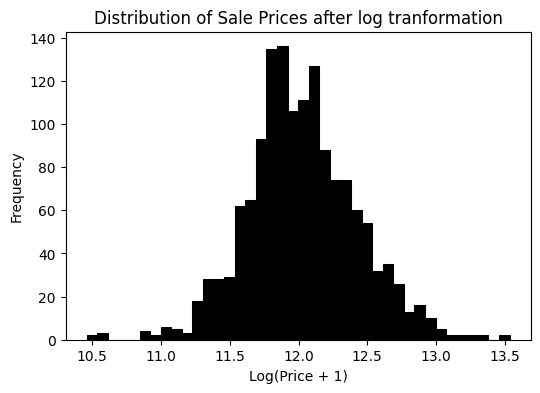

In [9]:
# Stablizing the Sales Price

Price = np.log1p(df_train.SalePrice)

plt.figure(figsize=(6, 4))

sns.histplot(Price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of Sale Prices after log tranformation')

plt.show()

In [10]:
Price = df_train['SalePrice']

## Exploratory Data Analysis

In [11]:
# My features

printmd("**Data fields of desired features**")

# Subset of my features of interest
house_data1 = df_train[['MSZoning', 'LotArea', 'Street', 'Utilities', 'Neighborhood',
                        'Condition1', 'Electrical', 'OverallQual','YearBuilt', 'Functional',
                        'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

**Data fields of desired features**

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>SalePrice</td>
<td>The property's sale price</td>
<td>Numeric, int</td>
</tr>
<tr>
<td>MSZoning</td>
<td>The general zoning classification</td>
<td>Categorical</td>
</tr>
<tr>
<td>LotArea</td>
<td>Lot size in square feet</td>
<td>Numeric</td>
</tr>
<tr>
<td>Street</td>
<td>Type of road access (Paved/Gravel)</td>
<td>Categorical</td>
</tr>
<tr>
<td>Utilities</td>
<td>Type of utilities available</td>
<td>Categorical</td>
</tr>
<tr>
<td>Neighborhood</td>
<td>Physical locations within Ames city limits</td>
<td>Categorical</td>
</tr>
<tr>
<td>Condition1</td>
<td>Proximity to main road or railroad</td>
<td>Categorical</td>
</tr>
<tr>
<td>Electrical</td>
<td>Electrical system</td>
<td>categorical</td>
</tr>
<tr>
<td>OverallQual</td>
<td>Overall material and finish quality</td>
<td>Numerical</td>
</tr>
<tr>
<td>YearBuilt</td>
<td>Original construction date</td>
<td>Date</td>
</tr>
<tr>
<td>Functional</td>
<td>Home functionality rate</td>
<td>categorical</td>
</tr>
<tr>
<td>MoSold</td>
<td>Month Sold</td>
<td>Date</td>
</tr>
<tr>
<td>YrSold</td>
<td>Year Sold</td>
<td>Date</td>
</tr>
<tr>
<td>SaleType</td>
<td>Type of sale</td>
<td>categorical</td>
</tr>
<tr>
<td>SaleCondition</td>
<td>Condition of sale/td>
<td>categorical</td>
</tr>
</tbody>
</table>

In [12]:
house_data1.head()

,MSZoning,LotArea,Street,Utilities,Neighborhood,Condition1,Electrical,OverallQual,YearBuilt,Functional,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,
1,RL,8450,Pave,AllPub,CollgCr,Norm,SBrkr,7,2003,Typ,2,2008,WD,Normal,208500
2,RL,9600,Pave,AllPub,Veenker,Feedr,SBrkr,6,1976,Typ,5,2007,WD,Normal,181500
3,RL,11250,Pave,AllPub,CollgCr,Norm,SBrkr,7,2001,Typ,9,2008,WD,Normal,223500
4,RL,9550,Pave,AllPub,Crawfor,Norm,SBrkr,7,1915,Typ,2,2006,WD,Abnorml,140000
5,RL,14260,Pave,AllPub,NoRidge,Norm,SBrkr,8,2000,Typ,12,2008,WD,Normal,250000


In [13]:
# Checking the dimension of our new subset
printmd(f"house_data1 Dimension is: **{house_data1.shape[0]}** rows,  **{house_data1.shape[1]}** columns")

house_data1 Dimension is: **1460** rows,  **15** columns

In [14]:
# Summary of the records to have more closer view about our features
house_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotArea        1460 non-null   int64 
 2   Street         1460 non-null   object
 3   Utilities      1460 non-null   object
 4   Neighborhood   1460 non-null   object
 5   Condition1     1460 non-null   object
 6   Electrical     1459 non-null   object
 7   OverallQual    1460 non-null   int64 
 8   YearBuilt      1460 non-null   int64 
 9   Functional     1460 non-null   object
 10  MoSold         1460 non-null   int64 
 11  YrSold         1460 non-null   int64 
 12  SaleType       1460 non-null   object
 13  SaleCondition  1460 non-null   object
 14  SalePrice      1460 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 182.5+ KB


We have one Null Value in Electrical, let's take a closer look....

In [15]:
house_data1[house_data1['Electrical'].isnull()]

,MSZoning,LotArea,Street,Utilities,Neighborhood,Condition1,Electrical,OverallQual,YearBuilt,Functional,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,
1380,RL,9735,Pave,AllPub,Timber,Norm,NaN,5,2006,Typ,5,2008,WD,Normal,167500


In [16]:
printmd(f'Looks like **Missing Error at Random**')

print('-----------------------------------------')

print(f'Guessing the correct value to impute on Error at Random is usually difficult so,')
print(f"I'll be filling it with word ~ Missing")

Looks like **Missing Error at Random**

-----------------------------------------
Guessing the correct value to impute on Error at Random is usually difficult so,
I'll be filling it with word ~ Missing


In [17]:
# Using Fillna
house_data1 = house_data1.fillna({'Electrical': 'Missing'})

In [18]:
# Summary of Categorical Features - Descriptive Analysis of the Categorical Features
house_data1.describe(include=['object']).T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Utilities,1460,2,AllPub,1459
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Electrical,1460,6,SBrkr,1334
Functional,1460,7,Typ,1360
SaleType,1460,9,WD,1267
SaleCondition,1460,6,Normal,1198


In [19]:
# Aggregating the Zonal Regions to ascertain the population count
house_data1.groupby('MSZoning')['MSZoning'].agg('count')

,MSZoning
MSZoning,
C (all),10
FV,65
RH,16
RL,1151
RM,218


The data recorded **Residential Low Density Zone** as the highest count of **1151**, where people live, which is then followed by **Residential Medium Density with 218 count**. Although we don't the reason WHY yet.

In [20]:
# Aggregating the Zonal Region to check the population with regards to the Neighbourhood
house_data1.groupby('Neighborhood')['MSZoning'].agg('count').sort_values(ascending=False)

,MSZoning
Neighborhood,
NAmes,225
CollgCr,150
OldTown,113
Edwards,100
Somerst,86
Gilbert,79
NridgHt,77
Sawyer,74
NWAmes,73


Grouping the Neighbourhood by their Zonal region, the **top 5 areas** that has more populations are: **Northwest Ames, College Creek, Old Town, Edwards and Somerset**. The **2 lowest** are: **Northpark Villa and Bluestem**.

In [21]:
# Statistical Summary
house_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,6.0,7.0,10.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.0,1973.0,2000.0,2010.0
MoSold,1460.0,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


<Axes: ylabel='MSZoning,MoSold'>

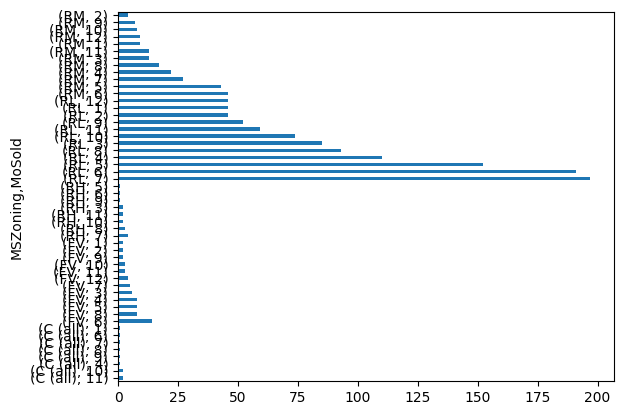

In [22]:
house_data1.groupby('MSZoning')['MoSold'].value_counts().plot(kind='barh')

In [23]:
# Split the features - Numeric & Category
# save all categorical columns in list
categorical_columns = [col for col in house_data1.columns.values if house_data1[col].dtype == 'object']

# Numerical Features
numerical_columns = [b for b in house_data1.columns if b not in categorical_columns]

# dataframe with categorical features
data_cat = house_data1[categorical_columns]
# dataframe with numerical features
data_num = house_data1[numerical_columns]

In [24]:
data_num.head()

,LotArea,OverallQual,YearBuilt,MoSold,YrSold,SalePrice
Id,,,,,,
1,8450,7,2003,2,2008,208500
2,9600,6,1976,5,2007,181500
3,11250,7,2001,9,2008,223500
4,9550,7,1915,2,2006,140000
5,14260,8,2000,12,2008,250000


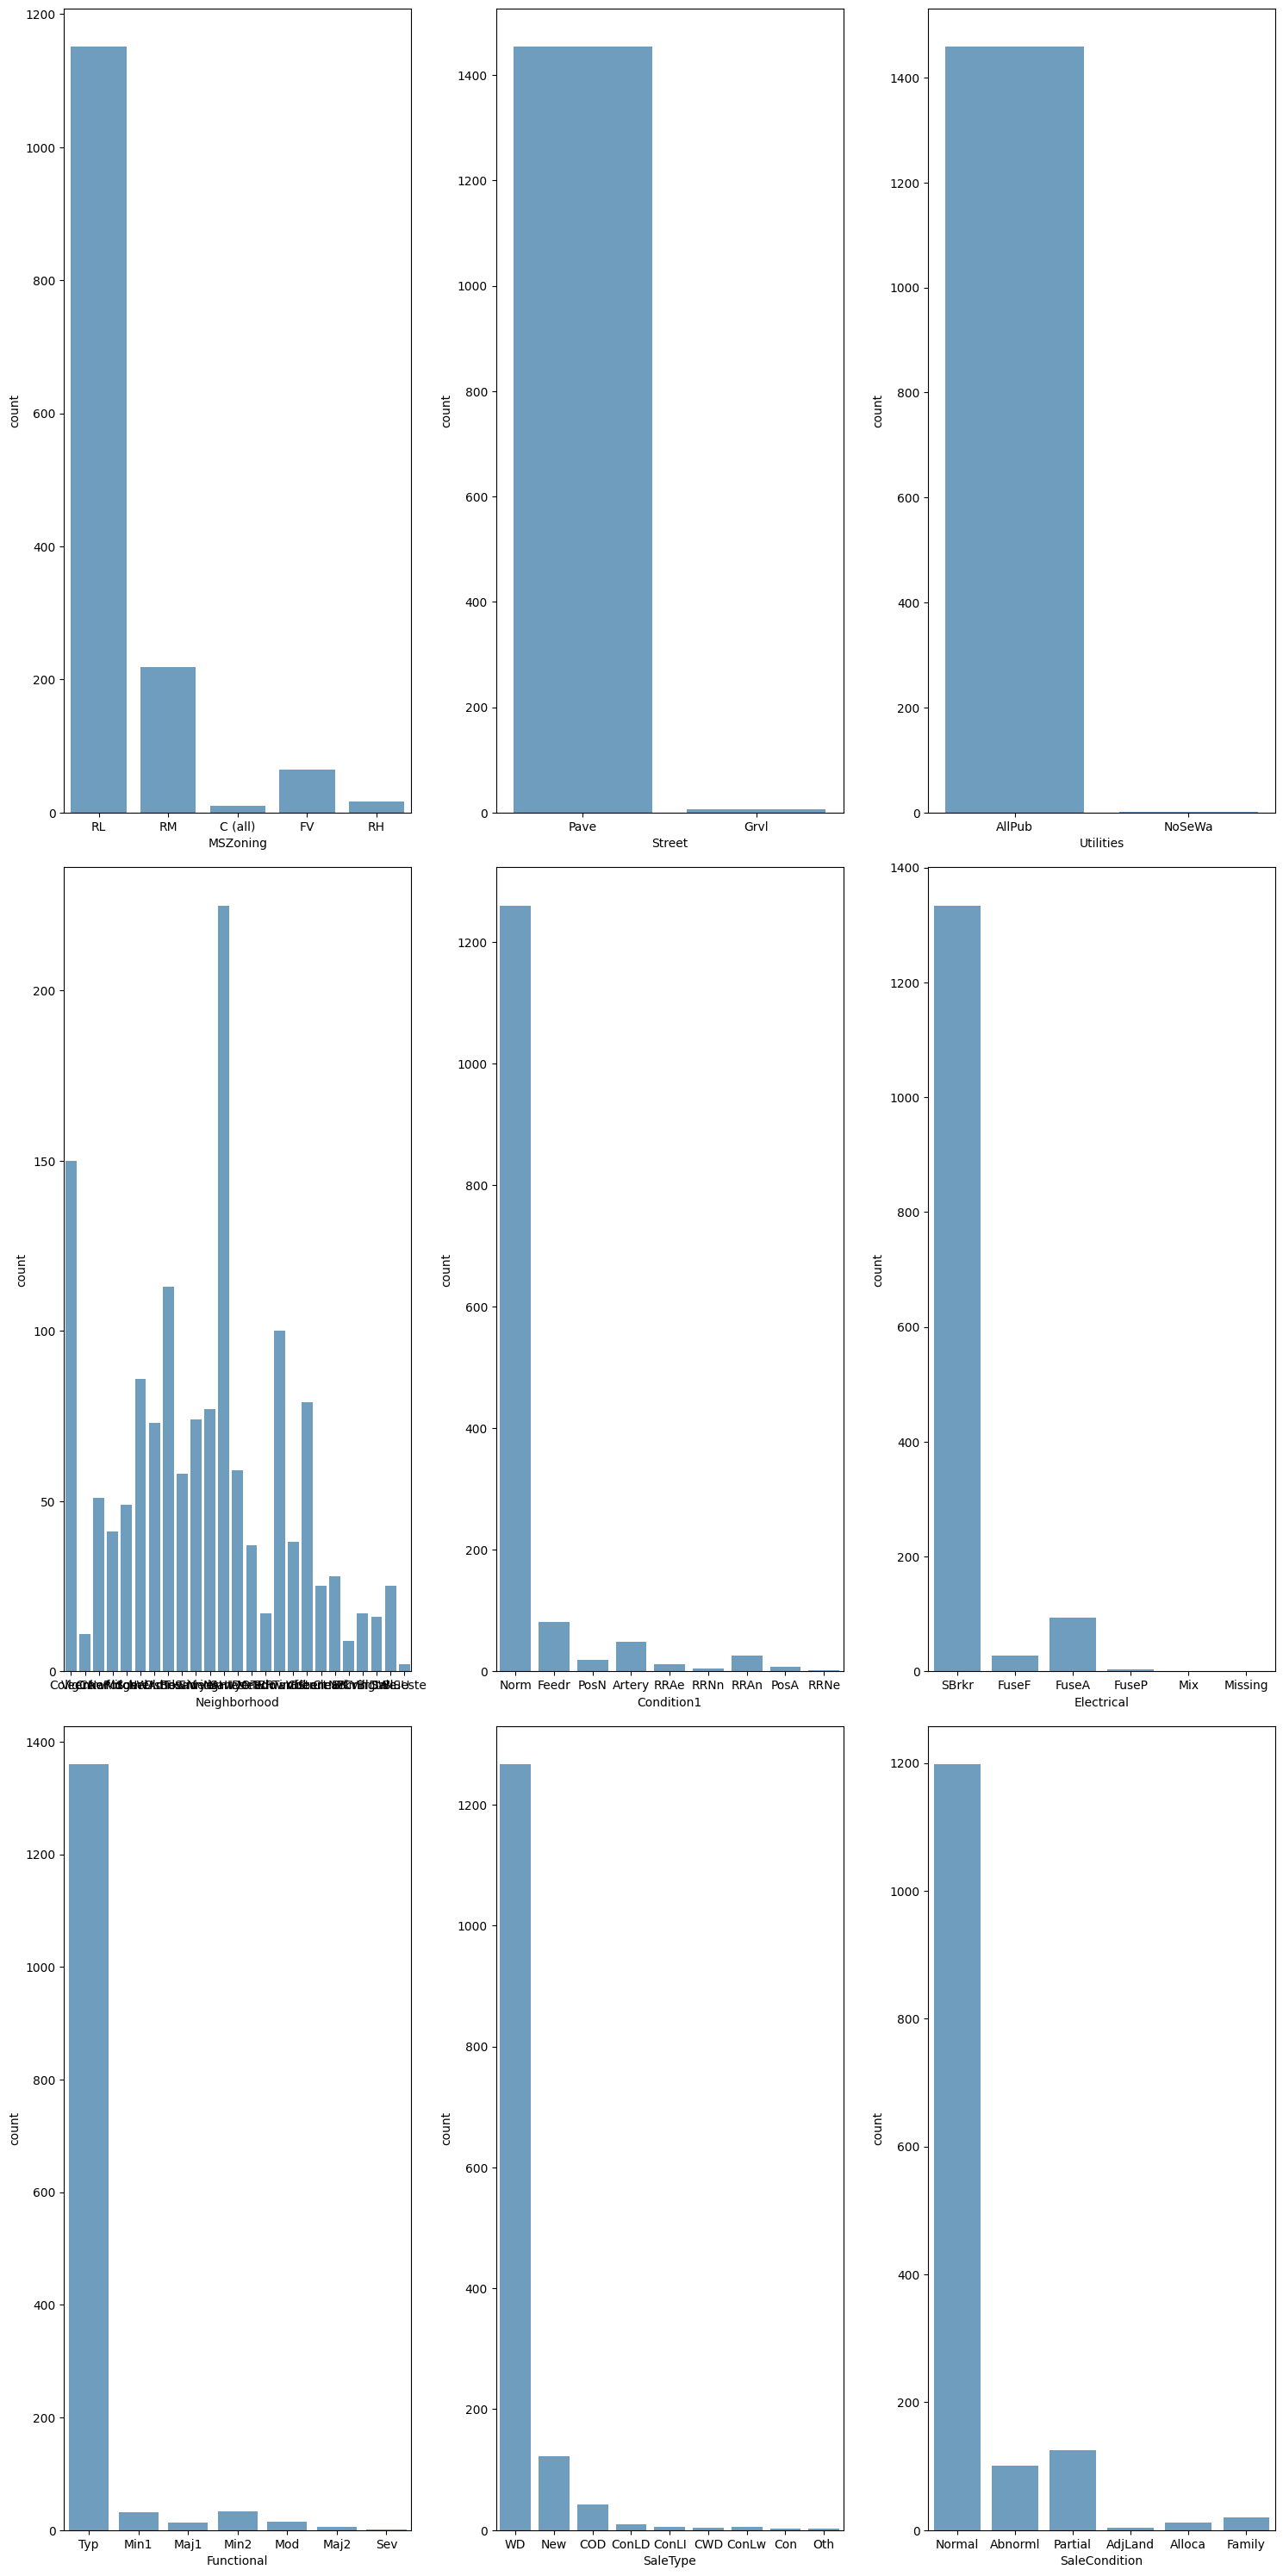

In [25]:
# Visualization of the Categorical features to check their distribution at a glance
fig, axes = plt.subplots(round(len(data_cat.columns) / 3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    if i < len(data_cat.columns):
        sns.countplot(x=data_cat.columns[i], alpha=0.7, data=data_cat, ax=ax)

fig.tight_layout()

In [26]:
# Checking the features Correlation at a glance - Statistical Analysis
data_num.corr()

,LotArea,OverallQual,YearBuilt,MoSold,YrSold,SalePrice
LotArea,1.000000,0.105806,0.014228,0.001205,-0.014261,0.263843
OverallQual,0.105806,1.000000,0.572323,0.070815,-0.027347,0.790982
YearBuilt,0.014228,0.572323,1.000000,0.012398,-0.013618,0.522897
MoSold,0.001205,0.070815,0.012398,1.000000,-0.145721,0.046432
YrSold,-0.014261,-0.027347,-0.013618,-0.145721,1.000000,-0.028923
SalePrice,0.263843,0.790982,0.522897,0.046432,-0.028923,1.000000


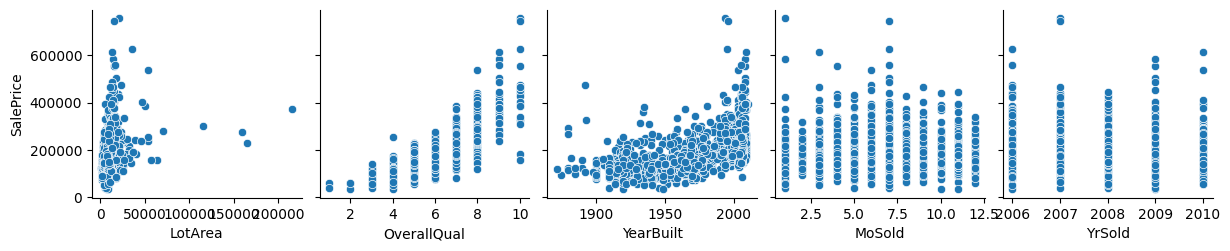

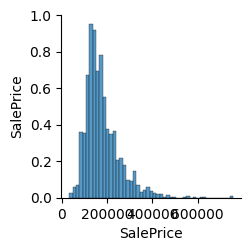

In [27]:
# Distribution of Numerical Features with regards to Target Variable
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data=data_num,
                x_vars=data_num.columns[i:i+5],
                y_vars=['SalePrice'])

Looking at the pictorial evidence of the correlations, i had no idea how **OverallQual** scored high maybe because it moves in uniform with Price.

In [28]:
printmd(f'**OverallQual has 79%** correlation with the Price followed by **52% of YearBuilt**')

print('LotArea on the other hand, has a low positive correlation of 26%')

**OverallQual has 79%** correlation with the Price followed by **52% of YearBuilt**

LotArea on the other hand, has a low positive correlation of 26%


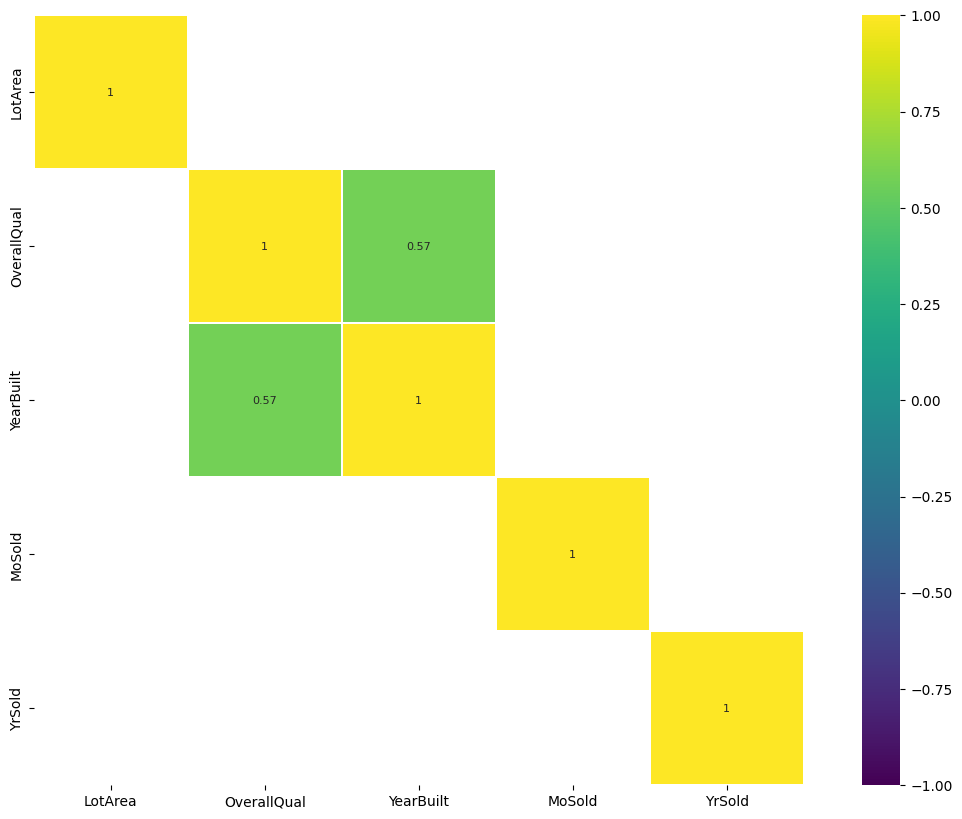

In [29]:
# Using a heatmap for Spatial Analysis
corr = data_num.drop('SalePrice', axis=1).corr()
plt.figure(figsize=(15, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

From the heatmap, we maybe dropping **Month & Year sold** as they seems insignificant for our model.

<u>Q1 ~ ANS</u>

The primary determinant of the house prices can be seen as:

**The Year**, the houses was built

**The Overall Quality** of the materials used in building the houses

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

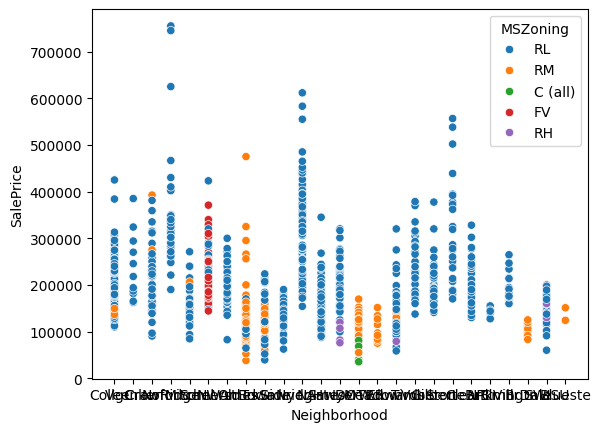

In [30]:
# Using the Scatterplot for multivariate
sns.scatterplot(x='Neighborhood',y='SalePrice',hue='MSZoning', data=house_data1)

Although we couldn't see the neighbourhood clearly, it's safe to deduce that **Residencial Low Density**  has more clutter. It's only on about four neighbourhood that has no record of RL zonal Area.

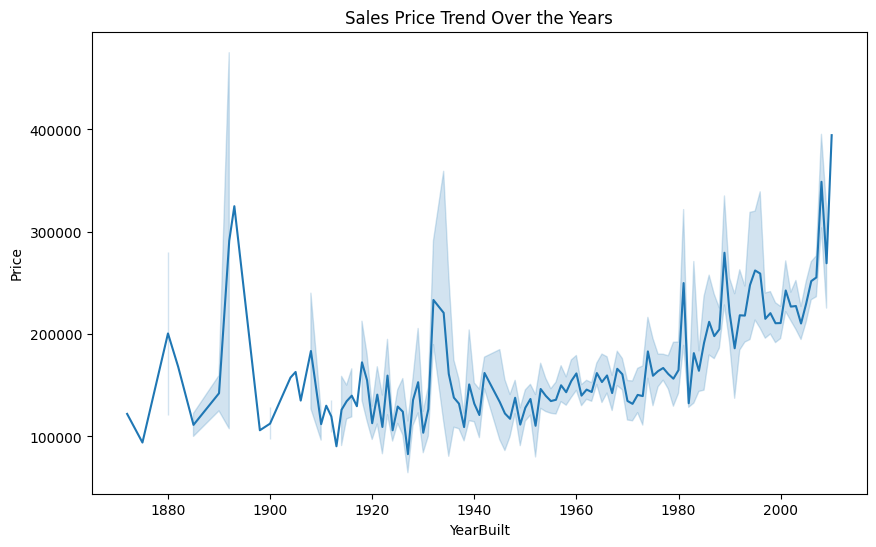

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearBuilt', y='SalePrice', data=house_data1)
plt.xlabel('YearBuilt')
plt.ylabel('Price')
plt.title('Sales Price Trend Over the Years')
#plt.xticks(rotation=90)
plt.show()

There are lots of peak on prices but the analysis on the data shows that there were some years that wasn't recorded.

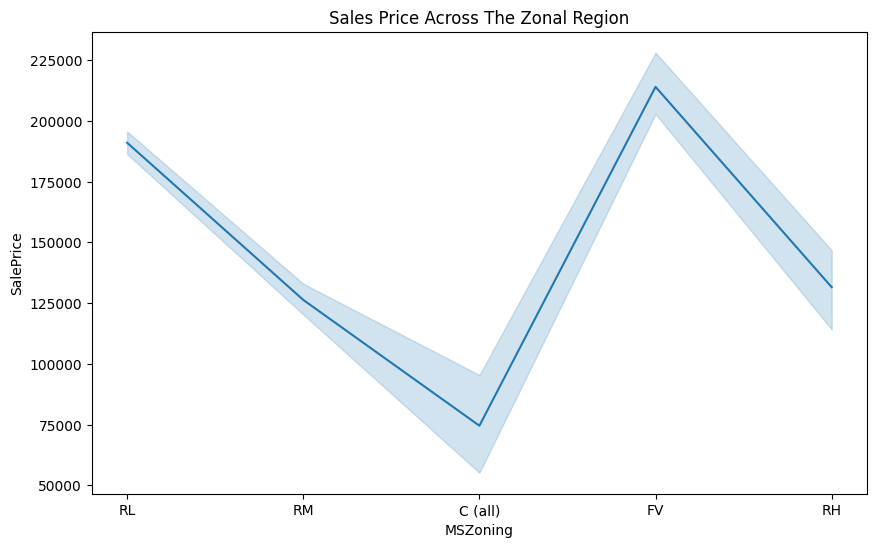

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='MSZoning', y='SalePrice', data=house_data1)
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')
plt.title('Sales Price Across The Zonal Region')
#plt.xticks(rotation=90)
plt.show()

**Floating Village Residential** seems to be **Pricier** of the whole Zonal Region, which is closely followed by **Residencial Low Density**.

<u>Q2 ~ ANS</u>

From the analysis, we can see a clear pattern:

**Residencial Low Density**, zonal house prices tends to be acceptable by many population.

We also fould out that the best **Overall Quality** material used is on the **Average**, probably that's why RL has more population.

**The Lot size area**, of this large population is actually within 0 - 50000 square/meter size.

This also address the fact that record was not updated for many years so, we can't accurately factor out how it spread in years.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

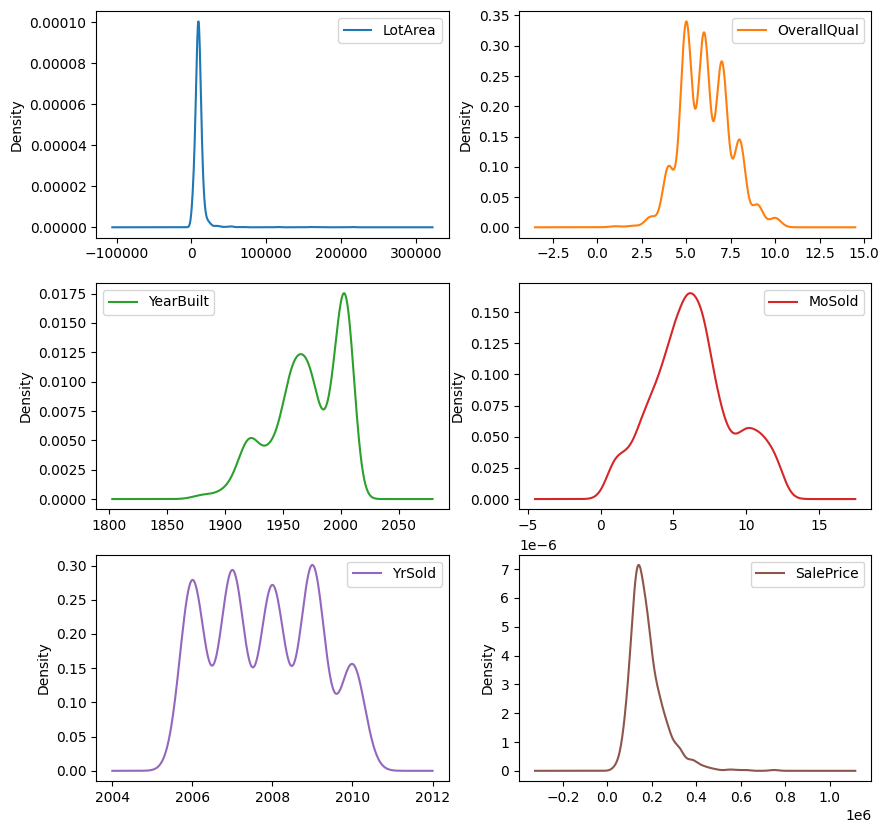

In [33]:
data_num.plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10))

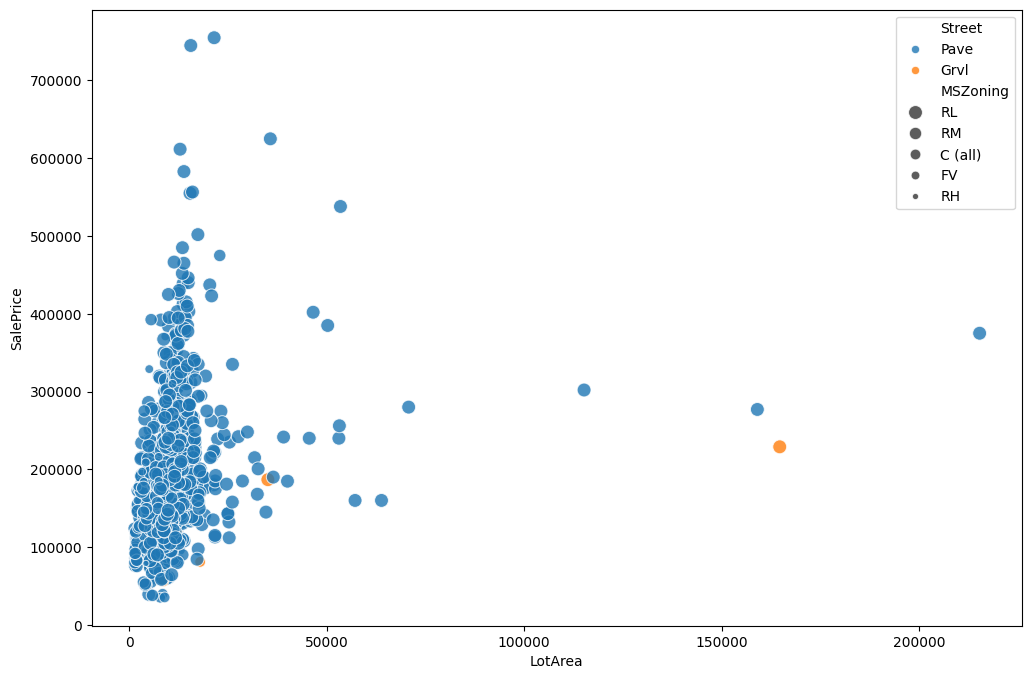

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="LotArea",
                y="SalePrice",
                size="MSZoning",
                sizes=(20,100),
                alpha=0.8,
                hue="Street",
                data=house_data1);

This inverably means that access to **over 95% of the property even with increase in Price is Paved**. Just a few areas that showed Graveled. Also, the major Zonal area is clearly seen as **RL followed by RM irrespective of the Price**

Perhaps, we couldn't get more Graveled Road due to lack of updated record.

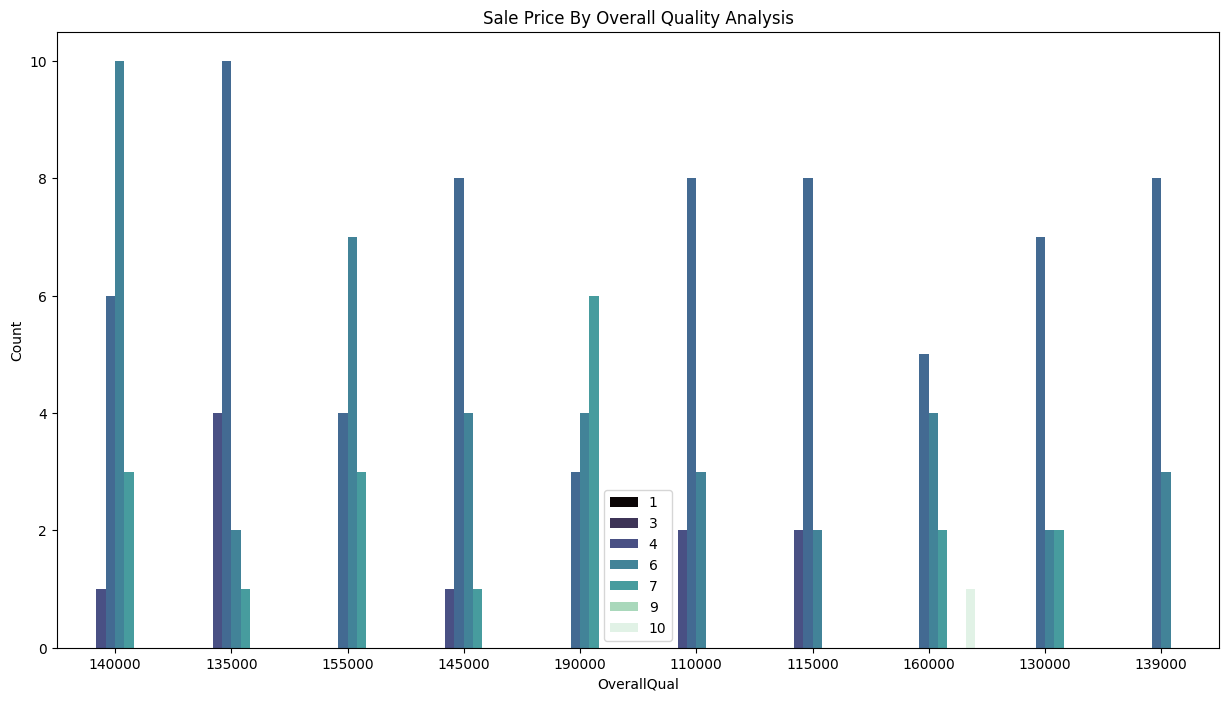

In [35]:
# Top 10 Areas with the highest Overall Quality Material By Sales Analysis

plt.figure(figsize=(15,8))
sns.countplot(x='SalePrice',data=data_num,palette='mako',hue ='OverallQual',order=data_num['SalePrice'].value_counts().index[0:10])
plt.xlabel('OverallQual')
plt.ylabel('Count')
plt.legend()
plt.title('Sale Price By Overall Quality Analysis')
plt.show()

It looks like the Overall Quality of the materials used for these houses are within **Average**. We can only see less 2% on the Execellency Level. Hmmm, that's not cool.

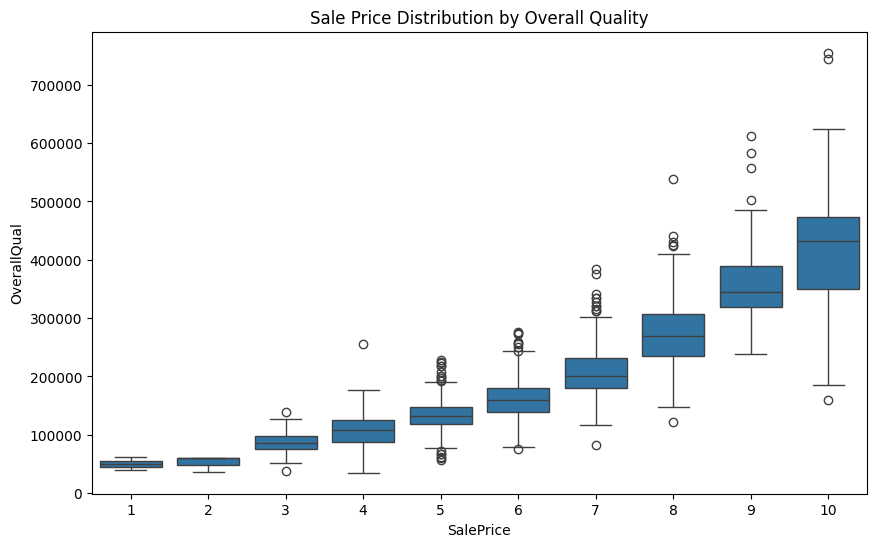

In [36]:
# Price Distribution by Overall Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=house_data1)
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.title('Sale Price Distribution by Overall Quality')
plt.show()

In [37]:
# Effect of Price on Neighbourhood by Zones
cat_zone = pd.DataFrame(house_data1.groupby(['Neighborhood','MSZoning']).sum()['SalePrice'])
cat_zone

SalePrice
Neighborhood MSZoning           
Blmngtn      RL          3134065
             RM           178740
Blueste      RM           275000
BrDale       RM          1671900
BrkSide      RL          3736075
             RM          3504300
ClearCr      RL          5951832
CollgCr      RL         28260166
             RM          1434700
Crawfor      RH           290000
             RL          9549361
             RM           902500
Edwards      RH           182600
             RL         11538870
             RM          1100500
Gilbert      RL         15235506
IDOTRR       C (all)      611380
             RM          3093200
MeadowV      RM          1675800
Mitchel      RL          6806436
             RM           850800
NAmes        RH           314000
             RL         32501593
NPkVill      RL          1284250
NWAmes       RL         13800655
NoRidge      RL         13747108
NridgHt      RL         24145838
             RM           207000
OldTown      C (all)      133900
             RL          1949930
             RM         12405629
SWISU        RH           789434
             RL          2775350
Sawyer       RL          9885692
             RM           237000
SawyerW      RH           528900
             RL         10477892
Somerst      FV         13910914
             RL          5471752
StoneBr      RL          7762475
Timber       RL          9205403
Veenker      RL          2626500

There's so much information in this simple analysis but we can clearly see that **Residencial Low Density Zone of the North Ames** sales the highest. Followed by another **Residencial Low Density Zone of the College Creek**. It is as if **Commercial & Industrial Zonal Areas** doesn't exist in all these 29 Neighborhood.

<u>Q3 ~ ANS</u>

Ways to improve Zonal Region House Prices:

The first is to improve on **The Quality of Materials** used for the house. When i can see an Excellent Quality material, naturally, i can pay more for it.

The **Functionality of a home** shouldn't be negotiable, everything must be up to par before bringing it out to the market.

Also, **The Sale Condition**, should be revisited.

These are but a fraction of how it can be improved but i am working according to the insights i got from my desired features.

<Axes: xlabel='SalePrice'>

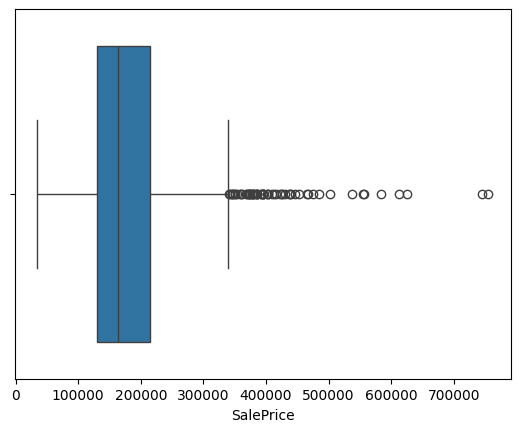

In [38]:
sns.boxplot(x=house_data1["SalePrice"])

There are quite a good number of outliers across all the variables both on the Target and dependent Features.

### Outliers

I'll be using the IQR for detection & removal of the outliers. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

The **interquartile range (IQR)**, also called the **midspread or middle 50%, or technically H-spread**, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.



In [39]:
#Q1 = house_data1.quantile(0.25)
#Q3 = house_data1.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)


In [40]:
#print(house_data1 < (Q1 - 1.5 * IQR)) |(house_data1 > (Q3 + 1.5 * IQR))

In [41]:
# IQR filter: within 2.22 IQR (equiv. to z-score < 3)

cols = house_data1.select_dtypes('number').columns  # limits to a (float), b (int) and e (timedelta)
df_sub = house_data1.loc[:, cols]

iqr = df_sub.quantile(0.75, numeric_only=False) - df_sub.quantile(0.25, numeric_only=False)
lim = np.abs((df_sub - df_sub.median()) / iqr) < 2.22

<Axes: xlabel='SalePrice'>

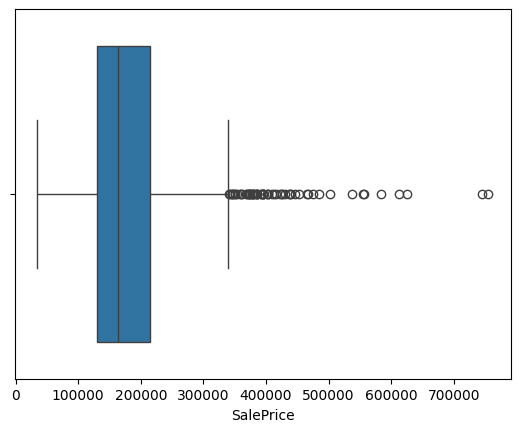

In [42]:
sns.boxplot(x=house_data1["SalePrice"])

In [43]:
data_num.head()

,LotArea,OverallQual,YearBuilt,MoSold,YrSold,SalePrice
Id,,,,,,
1,8450,7,2003,2,2008,208500
2,9600,6,1976,5,2007,181500
3,11250,7,2001,9,2008,223500
4,9550,7,1915,2,2006,140000
5,14260,8,2000,12,2008,250000


In [44]:
data_cat.head()

,MSZoning,Street,Utilities,Neighborhood,Condition1,Electrical,Functional,SaleType,SaleCondition
Id,,,,,,,,,
1,RL,Pave,AllPub,CollgCr,Norm,SBrkr,Typ,WD,Normal
2,RL,Pave,AllPub,Veenker,Feedr,SBrkr,Typ,WD,Normal
3,RL,Pave,AllPub,CollgCr,Norm,SBrkr,Typ,WD,Normal
4,RL,Pave,AllPub,Crawfor,Norm,SBrkr,Typ,WD,Abnorml
5,RL,Pave,AllPub,NoRidge,Norm,SBrkr,Typ,WD,Normal


In [45]:
data= pd.concat([data_num, data_cat], axis=1)
data.head(5)

,LotArea,OverallQual,YearBuilt,MoSold,YrSold,SalePrice,MSZoning,Street,Utilities,Neighborhood,Condition1,Electrical,Functional,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,
1,8450,7,2003,2,2008,208500,RL,Pave,AllPub,CollgCr,Norm,SBrkr,Typ,WD,Normal
2,9600,6,1976,5,2007,181500,RL,Pave,AllPub,Veenker,Feedr,SBrkr,Typ,WD,Normal
3,11250,7,2001,9,2008,223500,RL,Pave,AllPub,CollgCr,Norm,SBrkr,Typ,WD,Normal
4,9550,7,1915,2,2006,140000,RL,Pave,AllPub,Crawfor,Norm,SBrkr,Typ,WD,Abnorml
5,14260,8,2000,12,2008,250000,RL,Pave,AllPub,NoRidge,Norm,SBrkr,Typ,WD,Normal


In [46]:
data.isna().sum()

,0
LotArea,0
OverallQual,0
YearBuilt,0
MoSold,0
YrSold,0
SalePrice,0
MSZoning,0
Street,0
Utilities,0
Neighborhood,0


### Encoding the categorical variables

In [47]:
# Separate target from predictors
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3,
                                                                random_state=42)

# Drop columns with missing values (simplest approach)
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()]
X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [48]:
# View list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['MSZoning', 'Street', 'Utilities', 'Condition1', 'Electrical', 'Functional', 'SaleType', 'SaleCondition']


In [49]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)


## Model Training, Evaluation & Interpretation

In [50]:
# Using Linear Regression for the Model BenchMark
# Scaling of the data
scaler = StandardScaler()
scaler

StandardScaler()

In [51]:
# Using fit-transform to standardise train data
OH_X_train = scaler.fit_transform(OH_X_train)

In [52]:
# Using transform alone for test/valid to avoid data leakage
OH_X_valid = scaler.transform(OH_X_valid)

In [53]:
# LinearRegression
model= LinearRegression()
print(model.fit(OH_X_train, y_train))

#Coeficient Matrix
pd.DataFrame(model.coef_[0], X.columns, columns=['Coeficient'])

LinearRegression()


,Coeficient
LotArea,13631.258448
OverallQual,13631.258448
YearBuilt,13631.258448
MoSold,13631.258448
YrSold,13631.258448
MSZoning,13631.258448
Street,13631.258448
Utilities,13631.258448
Neighborhood,13631.258448
Condition1,13631.258448


In [54]:
print("Co-efficient of Independent Features is {}".format(model.coef_))
print("Intercept of best fit hyperparam is {}".format(model.intercept_))

Co-efficient of Independent Features is [ 1.36312584e+04  5.16883635e+04  3.73681030e+03 -1.17858702e+02
  8.35173544e+02 -1.38347463e+17 -4.44820078e+17 -2.48303401e+17
 -9.02957849e+17 -7.94704225e+17  1.01017566e+18  1.01017566e+18
 -1.73546918e+17 -1.73546918e+17 -1.10722084e+18 -1.37829072e+18
 -2.08951710e+18 -4.58852955e+17 -6.98141797e+17 -5.61146679e+17
 -7.45603449e+17 -1.87786761e+17 -4.19079814e+17 -9.21961795e+16
 -5.81707676e+16 -2.12182774e+16 -1.22624060e+16 -1.09448212e+17
 -8.80953979e+17 -5.88751712e+17 -1.42789052e+18 -1.45660362e+18
 -1.05668040e+18 -2.94809719e+17 -2.47379901e+18 -5.78900352e+17
 -2.25381991e+17 -1.59525762e+17 -2.97712272e+17 -1.12857084e+17
 -1.95282468e+17 -9.91375490e+17 -1.12857084e+17 -1.19868762e+18
 -1.43108934e+18 -3.58555437e+17 -4.00680029e+17 -7.34441414e+17
 -2.18247060e+18 -1.58567153e+18]
Intercept of best fit hyperparam is 181128.00301055278


In [55]:
y_pred = model.predict(OH_X_valid)
pd.DataFrame({'Y_Test':y_valid , 'Y_Pred':y_pred , 'Residuals':(y_valid - y_pred)}).head()

,Y_Test,Y_Pred,Residuals
Id,,,
893,154500,175624.003011,-21124.003011
1106,325000,261896.003011,63103.996989
414,115000,88840.003011,26159.996989
523,159000,137352.003011,21647.996989
1037,315500,301064.003011,14435.996989


In [56]:
test_residuals = y_valid - y_pred
test_residuals.head()

,SalePrice
Id,
893,-21124.003011
1106,63103.996989
414,26159.996989
523,21647.996989
1037,14435.996989


Text(0, 0.5, 'Y-Pred')

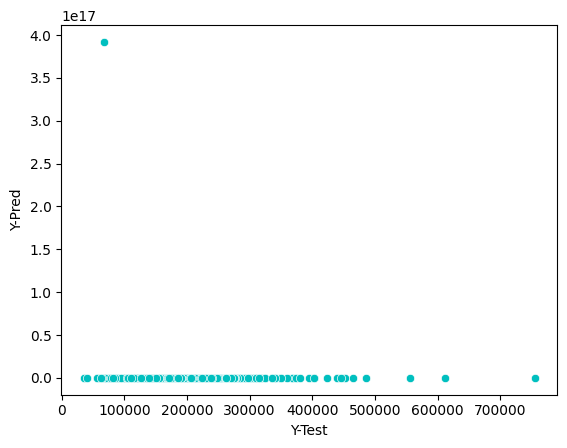

In [57]:
# Visualization for
sns.scatterplot(x = y_valid, y = y_pred , color='c')
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

Text(0, 0.5, 'Y-Pred')

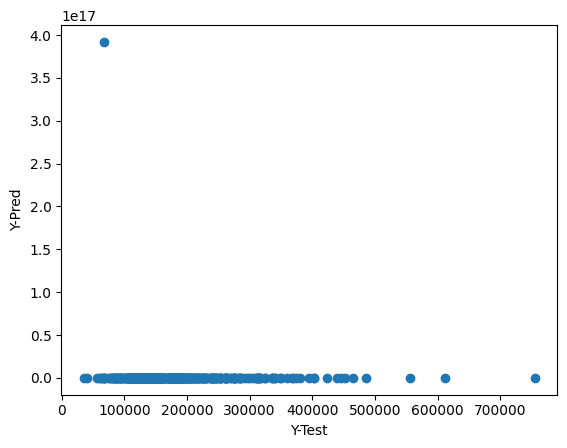

In [58]:
# Validation of Linear Relationship
plt.scatter(y_valid, y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

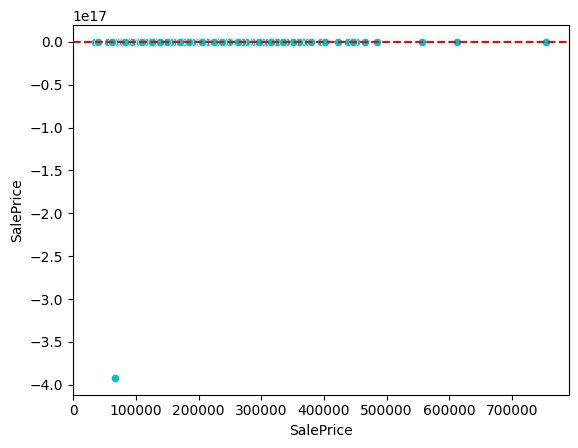

In [59]:
sns.scatterplot(x = y_valid, y = test_residuals , color='c')
plt.axhline(y=0, color='r', ls='--')

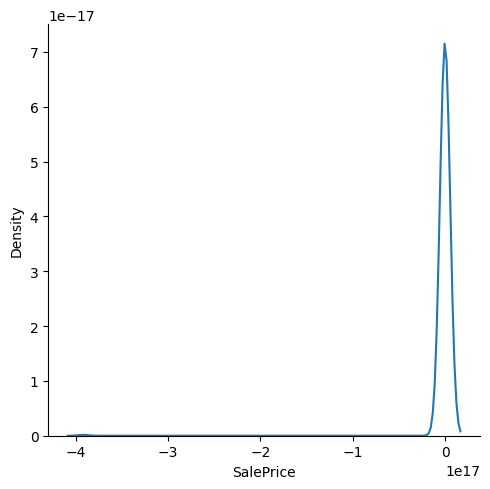

In [60]:
sns.displot(data = test_residuals, kind='kde')

In [61]:
# Cost Function
print(f' {round(mean_squared_error(y_valid, y_pred), 2)}')
print(f' {round(mean_absolute_error(y_valid, y_pred), 2)}')
print(f' {round(np.sqrt(mean_squared_error(y_valid, y_pred)), 2)}')

 3.508557394764719e+32
 895008659814855.6
 1.8731143570974836e+16


### Regularization & Training With Different Models

Regularization is being implemented to avoid overfitting of the data, especially when there is a large variance between train and test set performances.

The two techniques used for this are: Lasso (L1) and Ridge (L2)

While **Lasso** can be used for both **Regularization & Model Selection**, **Ridge** on the other hand can **ONLY** be used for **Regularization** as it's value tends to shrink closer to zero but never equals.

But for our Models, we'll be using Regressions with **Cross Validation**. This is in order to train our alpha values.

In [62]:
#Train with Ridge Model

ridge_model= Ridge(alpha=10)
print(ridge_model.fit(OH_X_train, y_train))


#predict Test Data
y_pred= ridge_model.predict(OH_X_valid)

#Evaluating the Model
MAE= mean_absolute_error(y_valid, y_pred)
MSE= mean_squared_error(y_valid, y_pred)
RMSE= np.sqrt(MSE)



Ridge(alpha=10)


In [63]:
#Train with RidgeCV Model
ridge_cv_model=RidgeCV(alphas=(0.5, 1.0, 10.0), scoring='neg_mean_absolute_error')
print(ridge_cv_model.fit(OH_X_train, y_train))

print('ridge_cv_model.alpha=' , ridge_cv_model.alpha_)

#Predicting Test Data
y_pred_ridge= ridge_cv_model.predict(OH_X_valid)

#Evaluating the Model
MAE_ridge= mean_absolute_error(y_valid, y_pred_ridge)
MSE_ridge= mean_squared_error(y_valid, y_pred_ridge)
RMSE_ridge= np.sqrt(MSE_ridge)


RidgeCV(alphas=(0.5, 1.0, 10.0), scoring='neg_mean_absolute_error')
ridge_cv_model.alpha= 10.0


In [64]:
#  Lasso Regression
lasso_cv_model= LassoCV(eps=0.01, n_alphas=100, cv=5)
print(lasso_cv_model.fit(OH_X_train, y_train))
print('lasso_cv_model.alpha=' , lasso_cv_model.alpha_)

y_pred_lasso= lasso_cv_model.predict(OH_X_valid)

#Evaluating the Model
MAE_Lasso= mean_absolute_error(y_valid, y_pred_lasso)
MSE_Lasso= mean_squared_error(y_valid, y_pred_lasso)
RMSE_Lasso= np.sqrt(MSE_Lasso)


LassoCV(cv=5, eps=0.01)
lasso_cv_model.alpha= 2347.746885821672


In [65]:
# Train with ElasticNetCV
elastic_model= ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],cv=5, max_iter=10000)
print(elastic_model.fit(OH_X_train, y_train))
print('elastic_model.l1_ratio=' , elastic_model.l1_ratio_)

y_pred_elastic=elastic_model.predict(OH_X_valid)

#Evaluating the Model
MAE_Elastic= mean_absolute_error(y_valid, y_pred_elastic)
MSE_Elastic= mean_squared_error(y_valid, y_pred_elastic)
RMSE_Elastic= np.sqrt(MSE_Elastic)


ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000)
elastic_model.l1_ratio= 1.0


In [66]:
# Show the Result of all Models

pd.DataFrame({'metrics':[MAE, MSE, RMSE],'ridge':[MAE_ridge ,MSE_ridge, RMSE_ridge] ,'LassoCV':[MAE_Lasso, MSE_Lasso, RMSE_Lasso]
              ,'ElasticNetCV':[MAE_Elastic, MSE_Elastic, RMSE_Elastic] } ,index=['MAE', 'MSE', 'RMSE'])

,metrics,ridge,LassoCV,ElasticNetCV
MAE,3.114539e+04,3.114539e+04,3.017103e+04,3.017853e+04
MSE,2.177416e+09,2.177416e+09,2.169328e+09,2.167985e+09
RMSE,4.666279e+04,4.666279e+04,4.657605e+04,4.656163e+04


## Conclusion & Reporting

This study set out to explore the intricate relationship between house prices with respect to the zonal regions in which they are located. By leveraging advanced modeling techniques such as LassoCV, RidgeCV, and ElasticNetCV, the analysis revealed several key insights into the factors driving house prices and the subsequent effects on various regions.

*Key Drivers of House Prices:*

- The analysis identified that **The Overall Quality of Material** used in building a house and **The Year it was built** are among the most significant determinants of house prices. These factors vary in importance across different zonal regions, highlighting the complex interplay between local conditions and property values.
Impact on Zonal Regions:

- Changes in house prices were found to have a profound impact on the demographic and **Lot Area Size** or landscape of the regions. For instance, rising house prices often correlate with increased gentrification, leading to shifts in the population's economic status and sometimes displacing long-term residents.

*Model Performance:*

- The advanced models used in this study provided a more accurate prediction of house prices compared to the baseline Linear Regression model. ElasticNetCV, in particular, balanced the complexity and interpretability of the model, making it a robust choice for this type of analysis.
Implications:

*For Urban Planners and Policymakers:*

- The findings underscore the importance of considering housing market dynamics in urban planning and policy-making. By understanding the factors that drive house prices and their impact on zonal regions, planners and policymakers can design strategies that promote equitable development and avoid unintended consequences like Sale Conditions.

- There is a need for targeted policies that address housing quality & functionality in regions where prices are rising rapidly. This could include affordable housing initiatives, zoning reforms, and investments in public infrastructure to support balanced regional growth.

*For Real Estate Investors:*

- Investors can use the insights from this study to make informed decisions about where to invest in the housing market. Understanding the drivers of house prices and the expected impact on different regions allows for strategic investments that align with market trends.


*For Future Research:*

- The study opens the door for further research into the long-term impacts of house prices on regional development. Future studies could explore non-linear relationships, incorporate more granular temporal data, or extend the analysis to different geographical areas to validate and expand upon these findings.

Additionally, exploring the effects of external factors such as Bedroom Sizes, Garage Areas, Utilities etc on house prices and zonal regions could provide valuable insights for future urban planning and economic forecasting.